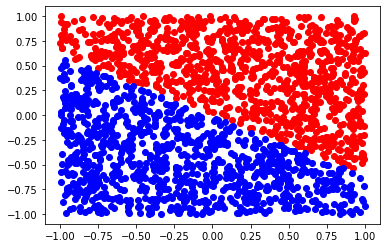

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import synthetic_data

# d = 2
# margin = 0.2 #np.random.uniform(0,0.5)

# b = np.random.uniform(-0.2,0.2)
# w = np.random.uniform(-1,1, d) 


# classA, classB = [], []
# for _ in range(1000):
#     point = np.random.uniform(-1, 1, d)
#     if w.T @ point + b > margin:
#         classA.append(point)
#     elif w.T @ point + b < -margin:
#         classB.append(point)

# #if len(classA)>0 and len(classB)>0:
# classA = np.array( classA )
# classB = np.array( classB )
# plt.plot( classA[:,0] , classA[:,1] ,  'o', color = 'red')
# plt.plot( classB[:,0] , classB[:,1] ,  'o', color = 'blue')
# contexts.make_task()


from numpy.linalg import norm
a = np.random.uniform(0,1)
contexts = synthetic_data.LinearContexts( np.array([a,1-a]), 0, 2, 0.01)

# contexts.generate_unique_context()
      
classA, classB = [], []

for _ in range(1000):
    c0 = contexts.get_context(0) 
    c1 = contexts.get_context(1) 
    classA.append( c0 )
    classB.append( c1 )

classA = np.array( classA )
classB = np.array( classB )
plt.plot( classA[:,0] , classA[:,1] ,  'o', color = 'red')
plt.plot( classB[:,0] , classB[:,1] ,  'o', color = 'blue')

plt.savefig('./linear.pdf')


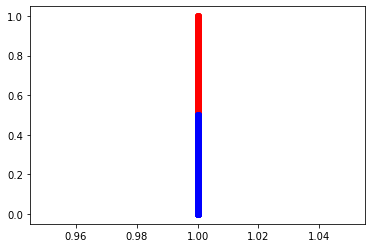

In [6]:
class ToyContexts:

    def __init__(self, ):
        pass

    def get_context(self, label):
        while True:
            context = np.random.uniform(0, 1, 1 )
            if   context >= 0.5 and label == 0:
                return [1,context] #/ norm(context, 1)
            elif  context < 0.5 and label == 1:
                return context #/ norm(context, 1)

    def generate_unique_context(self,):
        self.context_A = None
        self.context_B = None
        while  self.context_A == None or self.context_B == None:
            context = np.random.uniform(0, 1, 1)
            if context >= 0.5 and self.context_A == None :
                self.context_A = context #/ norm(context, 1)
            elif context < 0.5 and self.context_B == None:
                self.context_B = context #/ norm(context, 1)

    def get_same_context(self, label):
        if label == 0:
                return self.context_A
        elif label == 1:
                return self.context_B

contexts = ToyContexts(  )
contexts.generate_unique_context()
      
classA, classB = [], []

for _ in range(1000):
    c0 = contexts.get_context(0) 
    c1 = contexts.get_context(1) 

    classA.append( [1,c0] )
    classB.append( [1,c1] )

classA = np.array( classA , dtype=object)
classB = np.array( classB , dtype=object)
plt.plot( classA[:,0] , classA[:,1] ,  'o', color = 'red')
plt.plot( classB[:,0] , classB[:,1] ,  'o', color = 'blue')

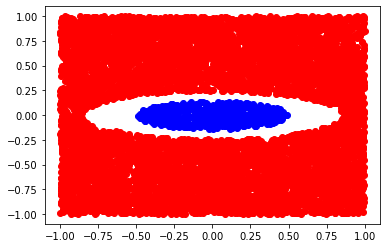

In [35]:

b = 0.2
a = 0.7
margin = 0.5

classA, classB = [], []
for _ in range(10000):
    point = np.random.uniform(-1, 1, 2)
    if ( point[0] / a)**2 + ( point[1] / b)**2 > 1 + margin:
        classA.append(point)
    elif ( point[0] / a)**2 + ( point[1] / b)**2 < 1 - margin:
        classB.append(point)

classA = np.array( classA )
classB = np.array( classB )
plt.plot( classA[:,0] , classA[:,1] ,  'o', color = 'red')
plt.plot( classB[:,0] , classB[:,1] ,  'o', color = 'blue')

In [1]:
import numpy as np
n_cores = 16
n_folds = 100
horizon = 100000
result = np.load( './results/benchmark_randcbp/apple_tasting/easy_{}_{}_{}.npy'.format(horizon,n_folds, 'Gaussian_18_100_10e7') )


In [2]:
with gzip.open( os.path.join(input_dir, 'LINUCB_reward_{}_{}.pkl.gz'.format(fold_id, knowledge) )  ,'rb') as f:
    reward = np.array( pkl.load(f),dtype='object' )